In [ ]:
# simple visualization file for the pendulum exammple. The log_file can be created by running
# ./ns3 run defiance-pendulum

In [1]:
import os
from collections.abc import Iterable
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist

In [3]:
data = pd.read_csv(os.getenv("NS3_HOME") + "/contrib/defiance/examples/pendulum-cart/log.txt", sep=",")
data.tail(10)

,nodeId,cartMass,pendulumMass,pendulumLength,angle,angleVelocity,position,velocity,acceleration,nextAcceleration
4989,0,1,1,1,-0.042958,1.20780,0.597552,0.734557,0.487823,0.487823
4990,0,1,1,1,-0.030874,1.20846,0.604952,0.739991,-0.933281,-0.933281
4991,0,1,1,1,-0.018913,1.19610,0.612198,0.724616,0.067937,0.067937
4992,0,1,1,1,-0.006963,1.19493,0.619446,0.724758,0.106596,0.106596
4993,0,1,1,1,0.004990,1.19531,0.626706,0.725979,0.207162,0.207162
4994,0,1,1,1,0.016969,1.19787,0.633998,0.729210,0.067189,0.067189
4995,0,1,1,1,0.028970,1.20021,0.641306,0.730841,-0.346150,-0.346150
4996,0,1,1,1,0.040966,1.19959,0.648574,0.726775,-0.419926,-0.419926
4997,0,1,1,1,0.052961,1.19941,0.655795,0.722106,0.297501,0.297501
4998,0,1,1,1,0.065036,1.20757,0.663082,0.728681,0.639441,0.639441


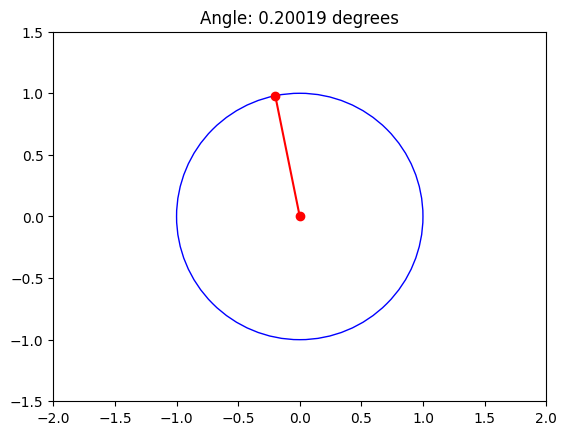

In [12]:
fig_anim, ax_anim = plt.subplots()
max_frames = 300
data_anim = data.iloc[:max_frames]


def update(frame: Any) -> Iterable[Artist]:
    ax_anim.clear()
    # Draw unit circle
    position = data_anim.iloc[frame]["position"]
    circle = plt.Circle((position, 0), 1, color="b", fill=False)
    ax_anim.add_artist(circle)
    # Calculate coordinates of the point on the unit circle
    angle_rad = data_anim.iloc[frame]["angle"]
    # rotate the angle by 90 degrees to match the transformation -> as theta is typically measured from the y-axis but we do it from the x-axis
    angle_rad = angle_rad + np.pi / 2
    x = position + np.cos(angle_rad)
    y = np.sin(angle_rad)
    # Plot the point
    ax_anim.plot([position, x], [0, y], color="r", marker="o")
    # Set plot limits and aspect ratio
    min_position = min(-2, *data_anim["position"])
    max_position = max(2, *data_anim["position"])
    ax_anim.set_xlim(min_position, max_position)
    ax_anim.set_ylim(-1.5, 1.5)
    ax_anim.set_aspect("equal")
    # Set title
    ax_anim.set_title(f"Angle: {angle_rad - np.pi / 2:.5f} degrees")
    yield circle


ani = FuncAnimation(fig_anim, update, frames=np.arange(0, data_anim.shape[0], 1), interval=10)
# this cell will output the first frame of the animation

In [13]:
HTML(ani.to_html5_video())

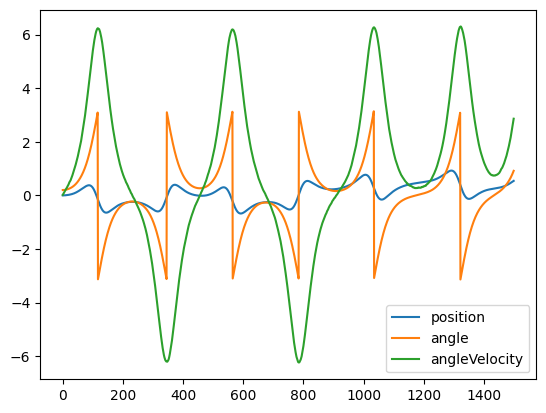

In [14]:
data_plot = data.iloc[0:1500]

fix, ax_anim = plt.subplots()

ax_anim.plot(data_plot["position"], label="position")
ax_anim.plot(data_plot["angle"], label="angle")
ax_anim.plot(data_plot["angleVelocity"], label="angleVelocity")
ax_anim.legend()
plt.show()